In [1]:
import numpy as np
import matplotlib.pyplot as plt
from turb.lesgo_utils import lesgo_data, read_array_from_file, write_array_to_file

ModuleNotFoundError: No module named 'turb'

In [2]:
str_func = lambda Lz, z, str_factor: Lz*(1+(np.tanh(str_factor*(z/Lz-1))/np.tanh(str_factor)))
gradient_str_func = lambda Lz, z, str_factor: Lz*(str_factor/Lz)*(1-(np.tanh(str_factor*(z/Lz-1)))**2)/np.tanh(str_factor)

In [3]:
root_dir = '/home/zyou6474/Projects/lesgo_adjoint_tutorial_bundle/tests/5_validation'

dims = [128, 128, 64]
domain = [2*np.pi, np.pi, 1]

ldata = lesgo_data(domain, dims, root_dir, ntheta=3)

In LESGO, if turn on stretched grids in z direction, the location of grid in z direction will not be linear but based on the stretched function e.g. `str_func` in the code. Here, I want to test how much error would it cost if we could the stretched function gradient to calculate dz.

In [4]:
actual_dz = ldata.coords[2] - np.roll(ldata.coords[2], 1)
actual_dz[0] = 2*ldata.coords[2][0] # mesh_uv(lbz) = - mesh_uv(1)

In [5]:
dz = ldata.domain[2]/(ldata.dims[2])
jaco_dz = dz * gradient_str_func(Lz = ldata.domain[2], z = ldata.kw_coords[2][:-1], str_factor=1.5)

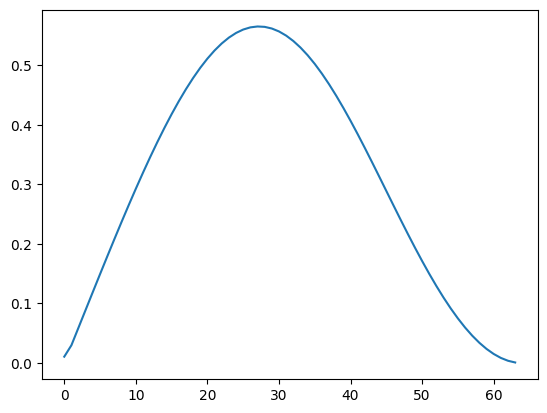

In [23]:
plt.plot(actual_dz/jaco_dz - 1)

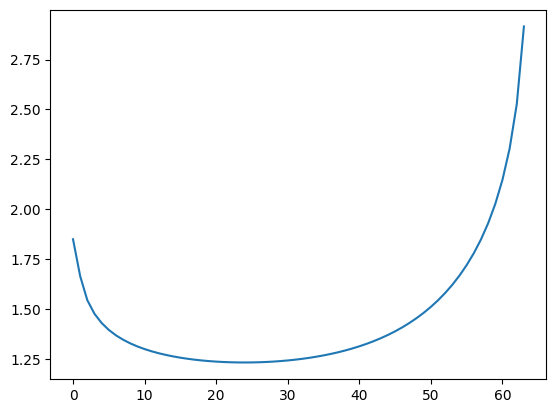

In [21]:
plt.plot(np.log(abs(actual_dz-jaco_dz))/np.log(actual_dz))

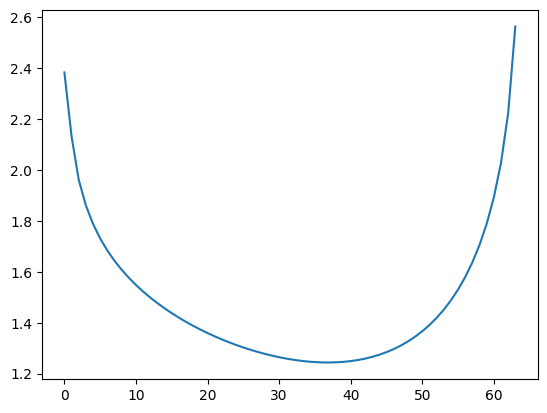

In [8]:
plt.plot(np.log(abs(actual_dz-jaco_dz))/np.log(dz))

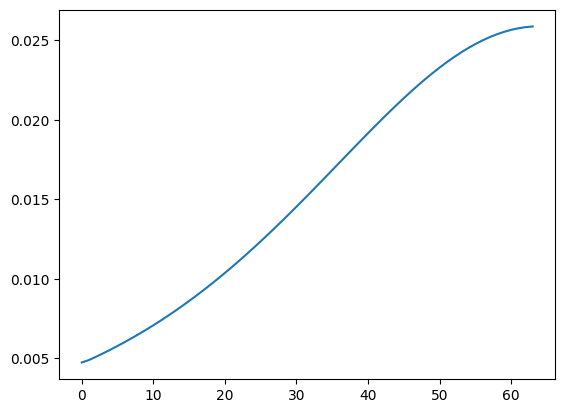

In [9]:
plt.plot(actual_dz)

This is a little bit different from what I expect. Maybe take a look at how these two function looks like.

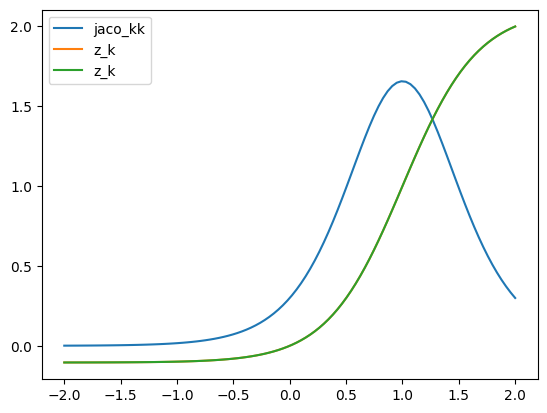

In [10]:
x = np.linspace(-2, 2, 100)
plt.plot(x, gradient_str_func(Lz = ldata.domain[2], z = x, str_factor=1.5), label='jaco_kk' )
plt.plot(x, str_func(Lz = ldata.domain[2], z = x, str_factor=1.5), label='z_k')
plt.plot(x, str_func(Lz = ldata.domain[2], z = x, str_factor=1.5), label='z_k')

plt.legend()

What if the length of z is larger than 1?

We could first guess from theoretical analysis. 
$$
\begin{aligned}
\frac{\mathrm{d}\xi}{\mathrm{d}z}( z ) & = \xi'(z)\\
\xi(z + \mathrm{d}z) - \xi(z) & = \xi'(z)\mathrm{d}z + \mathrm{O}(\mathrm{d}z^2)
\end{aligned}
$$ 

In [11]:
Lz = 2
nz = 64
z = np.linspace(0, Lz, nz+1)
dz = z[1] - z[0]
z_kk = str_func(Lz, z, 1.5)
z_k = str_func(Lz, z+0.5*dz, 1.5)

In [12]:
test_actual_dz = z_k - np.roll(z_k, 1)
test_actual_dz[0] = 2*z_k[0] # mesh_uv(lbz) = - mesh_uv(1)
test_jaco_dz = dz * gradient_str_func(Lz, z = z_kk, str_factor=1.5)

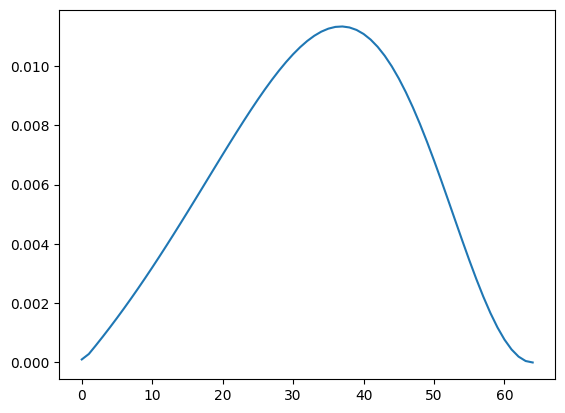

In [13]:
plt.plot(test_actual_dz-test_jaco_dz)

In [14]:
np.log(abs(test_actual_dz-test_jaco_dz))

array([ -9.21142359,  -8.16971353,  -7.46256293,  -7.04259614,
        -6.74049708,  -6.50315764,  -6.3069245 ,  -6.13918992,
        -5.99243939,  -5.86183728,  -5.74409321,  -5.63687156,
        -5.53845901,  -5.44756568,  -5.36320025,  -5.28458835,
        -5.21111738,  -5.14229822,  -5.07773797,  -5.01712022,
        -4.96019039,  -4.90674489,  -4.85662282,  -4.80969975,
        -4.76588285,  -4.72510732,  -4.68733353,  -4.65254503,
        -4.62074706,  -4.59196552,  -4.56624647,  -4.54365587,
        -4.52427981,  -4.50822492,  -4.49561926,  -4.48661341,
        -4.48138209,  -4.48012601,  -4.48307431,  -4.49048751,
        -4.50266108,  -4.51992983,  -4.54267324,  -4.57132216,
        -4.60636691,  -4.6483677 ,  -4.69796764,  -4.75590965,
        -4.82305839,  -4.90042948,  -4.98922881,  -5.09090673,
        -5.20723423,  -5.34041286,  -5.49323769,  -5.66934752,
        -5.87362425,  -6.11286272,  -6.39696445,  -6.74123906,
        -7.17133515,  -7.73551971,  -8.54344305,  -9.96

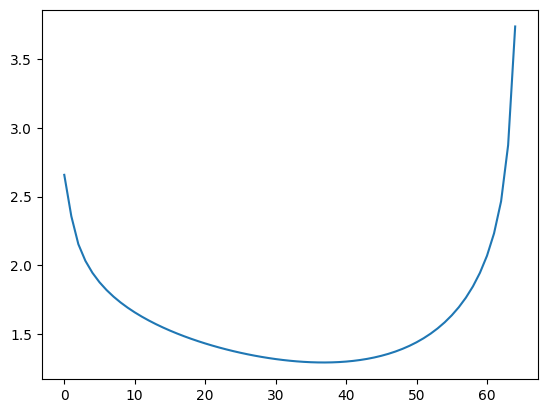

In [15]:
plt.plot(np.log(abs(test_actual_dz-test_jaco_dz))/np.log(dz), label='dz')

In [16]:
test_actual_dz-test_jaco_dz

array([ 9.98917373e-05,  2.83099103e-04,  5.74182692e-04,  8.73854961e-04,
        1.18205944e-03,  1.49869936e-03,  1.82363321e-03,  2.15666999e-03,
        2.49756408e-03,  2.84600996e-03,  3.20163643e-03,  3.56400074e-03,
        3.93258225e-03,  4.30677603e-03,  4.68588607e-03,  5.06911845e-03,
        5.45557434e-03,  5.84424294e-03,  6.23399455e-03,  6.62357373e-03,
        7.01159278e-03,  7.39652573e-03,  7.77670291e-03,  8.15030649e-03,
        8.51536710e-03,  8.86976196e-03,  9.21121486e-03,  9.53729826e-03,
        9.84543819e-03,  1.01329223e-02,  1.03969117e-02,  1.06344572e-02,
        1.08425203e-02,  1.10180006e-02,  1.11577690e-02,  1.12587079e-02,
        1.13177602e-02,  1.13319852e-02,  1.12986242e-02,  1.12151749e-02,
        1.10794739e-02,  1.08897878e-02,  1.06449120e-02,  1.03442739e-02,
        9.98803991e-03,  9.57722211e-03,  9.11378078e-03,  8.60071752e-03,
        8.04215342e-03,  7.44338557e-03,  6.81091496e-03,  6.15243877e-03,
        5.47680032e-03,  

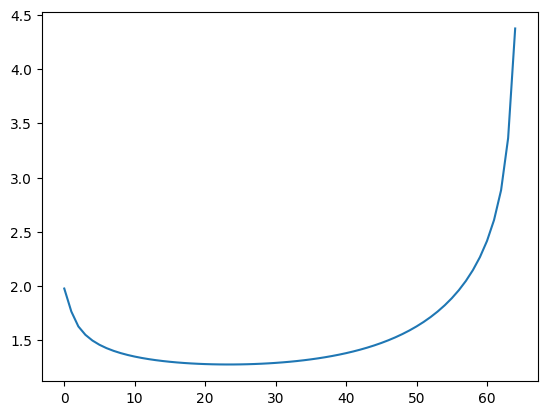

In [17]:
plt.plot(np.log(abs(test_actual_dz-test_jaco_dz))/np.log(test_actual_dz), label='dz')

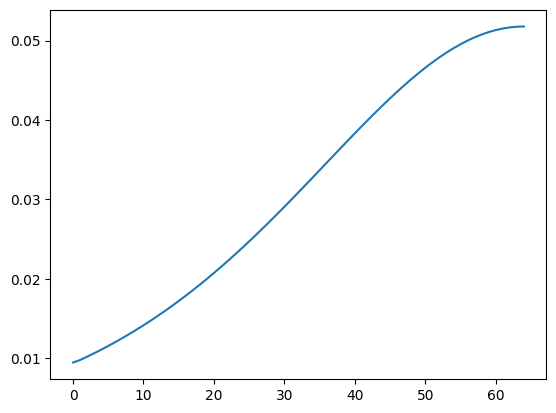

In [18]:
plt.plot(test_actual_dz)

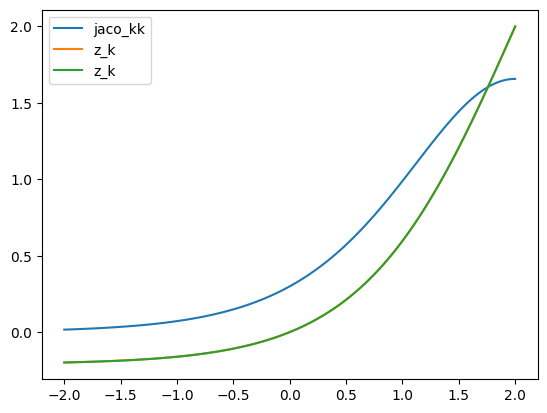

In [19]:
x = np.linspace(-2, 2, 100)
plt.plot(x, gradient_str_func(Lz, z = x, str_factor=1.5), label='jaco_kk' )
plt.plot(x, str_func(Lz, z = x, str_factor=1.5), label='z_k')
plt.plot(x, str_func(Lz, z = x, str_factor=1.5), label='z_k')

plt.legend()

So the maximum error is always in the middle because the length is also considered in the stretched function.